1. Building the TF-IDF matrix.
Following the steps in Project 1, transform the documents into TF-IDF vectors.
Use min_df = 3, exclude the stopwords (no need to do stemming or lemmatization).
QUESTION 1: Report the dimensions of the TF-IDF matrix you get.

In [14]:
import warnings; 
warnings.simplefilter('ignore')

In [89]:
import pickle

def save_object(data, fileName):
    with open(fileName + ".pickle", 'wb') as f:
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
        
def load_object(fileName):
    try:
        with open(fileName + ".pickle", 'rb') as f:
            data = pickle.load(f)
            return data
    except IOError:
        print("Could not read file: " + fileName)

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
np.random.seed(42)

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
# separate all data into two classes
labels = [1]*len(dataset.data)
for i in range(len(dataset.data)):
    if dataset.target[i] > 3:
        labels[i] = 0

# process data
def trim_data(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(temp[j])           
        data_list[i] = " ".join(ans)
        
trim_data(dataset.data)

# generate TF-IDF matrix
vectorizer = TfidfVectorizer(min_df=3, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(dataset.data)
print(X.shape)

save_object(X, "tfidf_data")

(7882, 23135)


2. Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random_state, max_iter and n_init. Please use random_state=0, max_iter > 1000 and n_init > 30. Compare the clustering results with the known class labels. (you can refer to sklearn - Clustering text documents using k-means for a basic work flow)


(a) Given the clustering result and ground truth labels, contingency table A is the matrix whose entries Aij is the number of data points that belong to both the class Ci the cluster Kj .

QUESTION 2: Report the contingency table of your clustering result.

In [3]:
import matplotlib.pyplot as plt
def plot_contingency_table(cm, title, actual_class_names, cluster_class_names):
    plt.imshow(cm, interpolation='nearest', cmap='GnBu')
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(actual_class_names))
    plt.xticks(tick_marks, actual_class_names)
    plt.yticks(tick_marks, cluster_class_names)
    
    plt.ylabel('Cluster Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.savefig(title+'.png')


In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix

# K-Means Clustering
km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

contingency table:


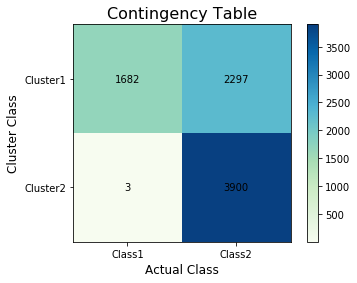

In [5]:
# Print results
contingency = contingency_matrix(labels, km.labels_)

print('contingency table:')
plt.figure()
title = 'Contingency Table'
plot_contingency_table(contingency, title, ["Class1", "Class2"], ['Cluster1', 'Cluster2'])
plt.show()
print()

b)In order to evaluate clustering results, there are various measures for a given partition of the data points with respect to the ground truth. We will use the measures homogeneity score, completeness score, V-measure, adjusted Rand score and adjusted mutual info score, all of which can be calculated by the corresponding functions provided in
sklearn.metrics

QUESTION 3:
Report the 5 measures above for the K-means clustering results you get.

In [6]:
print('Homogeneity:', metrics.homogeneity_score(labels, km.labels_))
print('Completeness:', metrics.completeness_score(labels, km.labels_)) 
print('V-measure:', metrics.v_measure_score(labels, km.labels_)) 
print('Adjusted Rand Score:', metrics.adjusted_rand_score(labels, km.labels_)) 
print('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(labels, km.labels_)) 

Homogeneity: 0.2480861826246507
Completeness: 0.3313589810284791
V-measure: 0.28373896215987654
Adjusted Rand Score: 0.17328640818785399
Adjusted Mutual Info Score: 0.24801733618150645


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [23]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000)
X_svd = svd.fit_transform(X)

V = svd.components_



In [90]:
save_object(svd, "svd_1000")
save_object(X_svd, "X_svd_1000")

QUESTION 4: Report the plot of the percent of variance the top r principle compo- nents can retain v.s. r, for r = 1 to 1000.

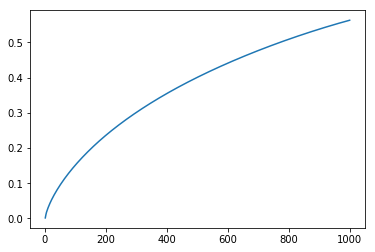

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1,1001), svd.explained_variance_.cumsum())  

QUESTION 5:
Let r be the dimension that we want to reduce the data to (i.e. n_components).
Try r = 1,2,3,5,10,20,50,100,300, and plot the 5 measure scores v.s. r for both
SVD and NMF.
Report the best r choice for SVD and NMF respectively.

In [33]:
from sklearn.decomposition import TruncatedSVD

def kmeans(X):
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    return km.fit(X)

In [228]:
r_values = [1,2,3,5,10,20,50,100,300]
y_svd_kmeans = [kmeans(X_svd[:, :r+1]) for r in r_values]

In [93]:
save_object(y_svd_kmeans, "y_svd_kmeans")

In [229]:
y_svd_homogeneity = [metrics.homogeneity_score(labels, km.labels_) for km in y_svd_kmeans]
y_svd_completeness = [metrics.completeness_score(labels, km.labels_) for km in y_svd_kmeans]
y_svd_adjusted_rand = [metrics.adjusted_rand_score(labels, km.labels_) for km in y_svd_kmeans]
y_svd_vmeasure = [metrics.v_measure_score(labels, km.labels_) for km in y_svd_kmeans]
y_svd_adjusted_mutual_info_score = [metrics.adjusted_mutual_info_score(labels, km.labels_) for km in y_svd_kmeans]

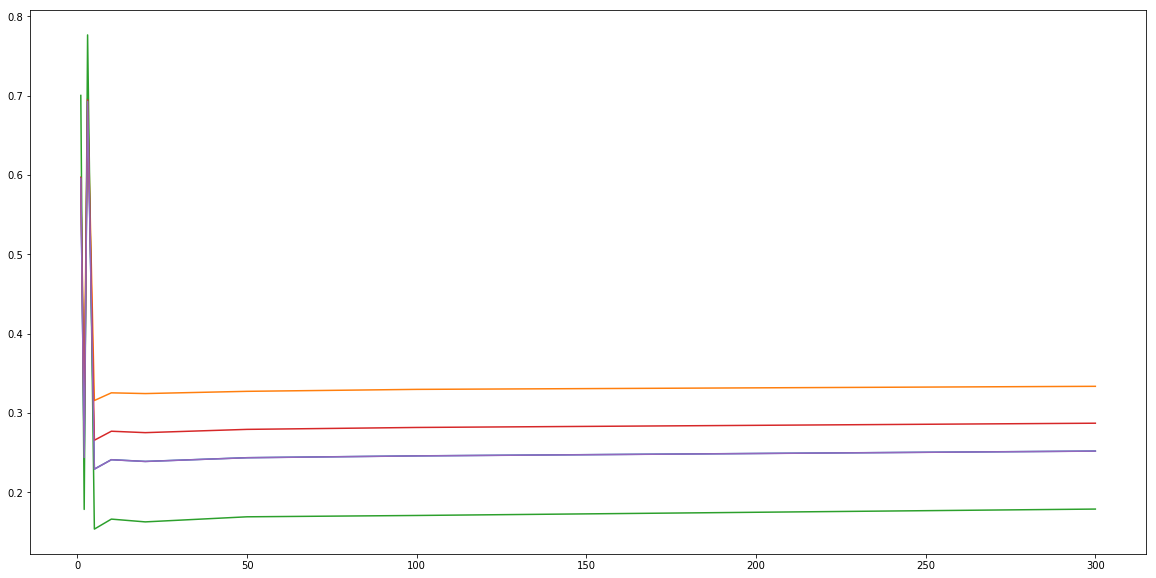

In [230]:
plt.figure(figsize=(20,10))

plt.plot(r_values, y_svd_homogeneity)
plt.plot(r_values, y_svd_completeness)
plt.plot(r_values, y_svd_adjusted_rand)
plt.plot(r_values, y_svd_vmeasure)
plt.plot(r_values, y_svd_adjusted_mutual_info_score)

In [232]:
print(r_values[y_svd_homogeneity.index(max(y_svd_homogeneity))])
print(r_values[y_svd_completeness.index(max(y_svd_completeness))])
print(r_values[y_svd_adjusted_rand.index(max(y_svd_adjusted_rand))])
print(r_values[y_svd_vmeasure.index(max(y_svd_vmeasure))])
print(r_values[y_svd_adjusted_mutual_info_score.index(max(y_svd_adjusted_mutual_info_score))])

3
3
3
3
3


In [240]:
from sklearn.decomposition import NMF

def nmf(X, n_components):
    nmf = NMF(n_components, init='random', random_state=0)
    return nmf.fit_transform(X)

In [242]:
r_values = [1,2,3,5,10,20,50,100,300]
y_nmf_kmeans = [kmeans(nmf(X, r)) for r in r_values]

In [243]:
save_object(y_nmf_kmeans, "y_nmf_kmeans")

In [244]:
if y_nmf_kmeans is None:
    y_nmf_kmeans = load_object("y_nmf_kmeans")

In [245]:
y_nmf_homogeneity = [metrics.homogeneity_score(labels, km.labels_) for km in y_nmf_kmeans]
y_nmf_completeness = [metrics.completeness_score(labels, km.labels_) for km in y_nmf_kmeans]
y_nmf_adjusted_rand = [metrics.adjusted_rand_score(labels, km.labels_) for km in y_nmf_kmeans]
y_nmf_vmeasure = [metrics.v_measure_score(labels, km.labels_) for km in y_nmf_kmeans]
y_nmf_adjusted_mutual_info_score = [metrics.adjusted_mutual_info_score(labels, km.labels_) for km in y_nmf_kmeans]

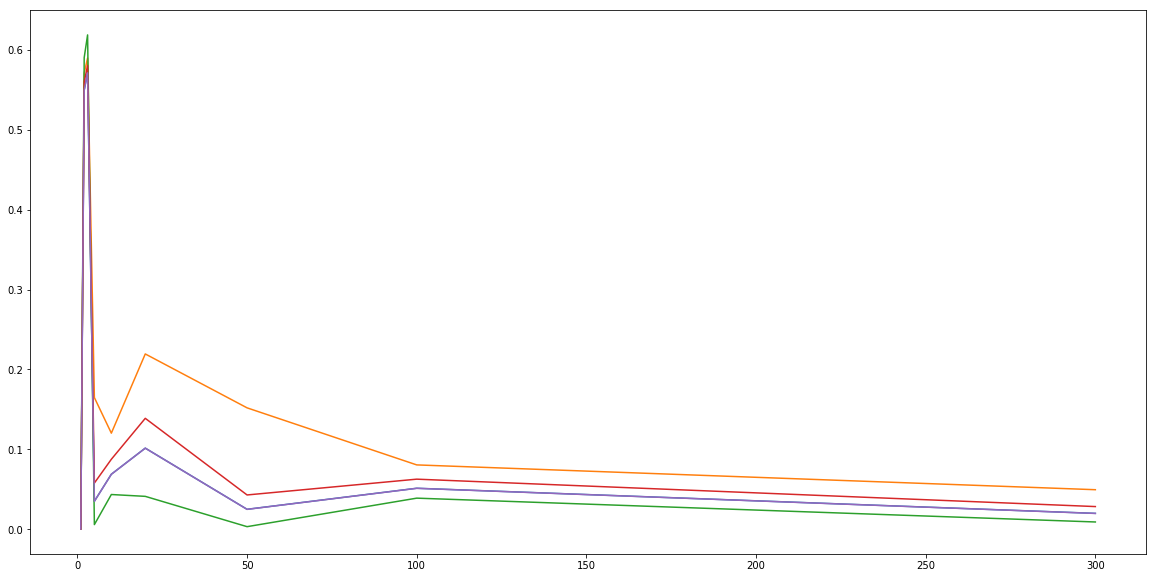

In [246]:
plt.figure(figsize=(20,10))

plt.plot(r_values, y_nmf_homogeneity)
plt.plot(r_values, y_nmf_completeness)
plt.plot(r_values, y_nmf_adjusted_rand)
plt.plot(r_values, y_nmf_vmeasure)
plt.plot(r_values, y_nmf_adjusted_mutual_info_score)

In [285]:
print(r_values[np.argmax(y_nmf_homogeneity)])
print(r_values[np.argmax(y_nmf_completeness)])
print(r_values[np.argmax(y_nmf_adjusted_rand)])
print(r_values[np.argmax(y_nmf_vmeasure)])
print(r_values[np.argmax(y_nmf_adjusted_mutual_info_score)])

3
3
3
3
3


####QUESTION 7: 
Visualize the clustering results for:
*SVD with its best r
*NMF with its best r

In [132]:
best_r = 3 # for both nmf and svd!

In [215]:
#using SVD to transform to 2D and plot

def transform_and_plot(x, y): 
    svd = TruncatedSVD(n_components=2).fit(x)
    data2D = svd.transform(x)
    plt.scatter(data2D[:,0], data2D[:,1], c=y)

In [217]:
y_svd = y_svd_kmeans[r_values.index(best_r)].labels_

In [195]:
X_svd_best = X_svd[:,:best_r+1]

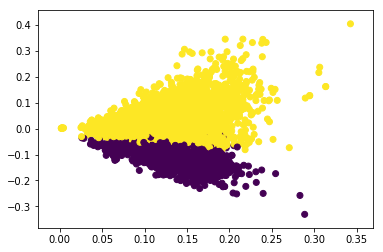

In [216]:
transform_and_plot(X_svd_best, y_svd)

In [293]:
y_nmf = y_nmf_kmeans[r_values.index(best_r)].labels_
X_nmf_best = nmf(X, best_r)

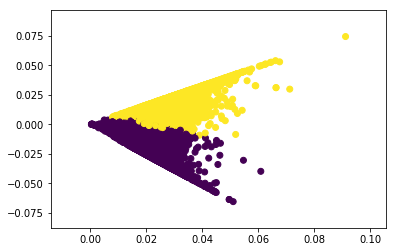

In [294]:
transform_and_plot(X_nmf_best, y_nmf)

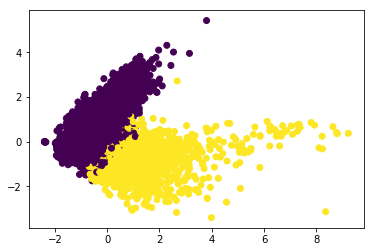

In [364]:
from sklearn import preprocessing

X_scaled_svd = preprocessing.scale(X_svd_best)
y_scaled_svd = kmeans(X_scaled_svd).labels_
transform_and_plot(X_scaled_svd, y_scaled_svd)

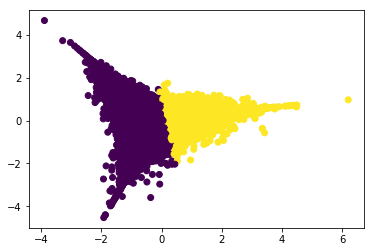

In [365]:
X_scaled_nmf = preprocessing.scale(X_nmf_best)
y_scaled_nmf = kmeans(X_scaled_nmf).labels_
transform_and_plot(X_scaled_nmf, y_scaled_nmf)

In [361]:
import numpy as np
import math

def non_linear_transform(x):
    c = 0.01
    return np.sign(x) * (np.log (np.abs(x) + c) - np.log (c))

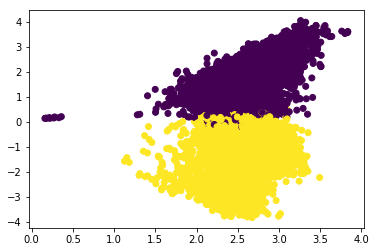

In [376]:
X_trans_svd = non_linear_transform(X_svd_best)
y_trans_svd = kmeans(X_trans_svd).labels_
transform_and_plot(X_trans_svd, y_trans_svd)

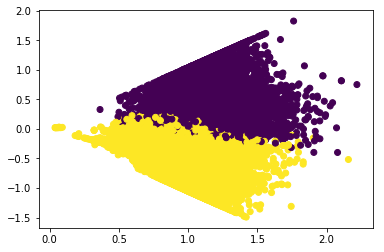

In [377]:
X_trans_nmf = non_linear_transform(X_nmf_best)
y_trans_nmf = kmeans(X_trans_nmf).labels_
transform_and_plot(X_trans_nmf, y_trans_nmf)

In [383]:
Xs_st = map_vector(preprocessing.scale(X_svd_best)) # SVD, scaled then transformed
ys_st = kmeans(Xs_st).labels_
Xs_ts = preprocessing.scale(non_linear_transform(X_svd_best)) # SVD, transformed then scaled
ys_ts = kmeans(Xs_ts).labels_

In [384]:
Xn_st = map_vector(preprocessing.scale(X_nmf_best)) # NMF, scaled then transformed
yn_st = kmeans(Xn_st).labels_
Xn_ts = preprocessing.scale(non_linear_transform(X_nmf_best)) # NMF, transformed then scaled
yn_ts = kmeans(Xn_ts).labels_

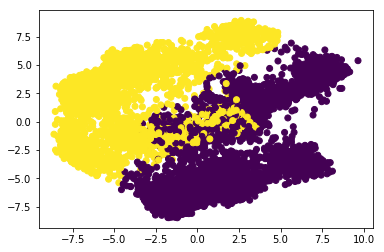

In [385]:
transform_and_plot(Xs_st, ys_st)

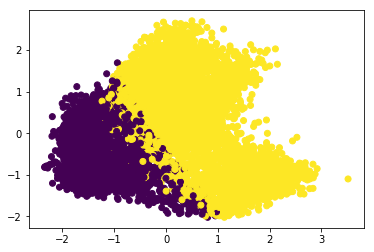

In [386]:
transform_and_plot(Xs_ts, ys_ts)

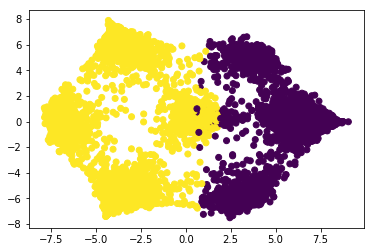

In [387]:
transform_and_plot(Xn_st, yn_st)

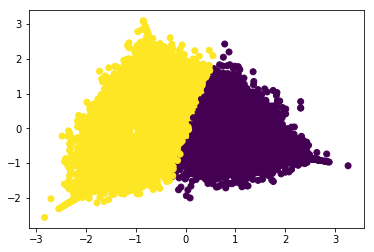

In [388]:
transform_and_plot(Xn_ts, yn_ts)